In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
fish_data=pd.read_csv("Fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
fish_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [5]:
fish_data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


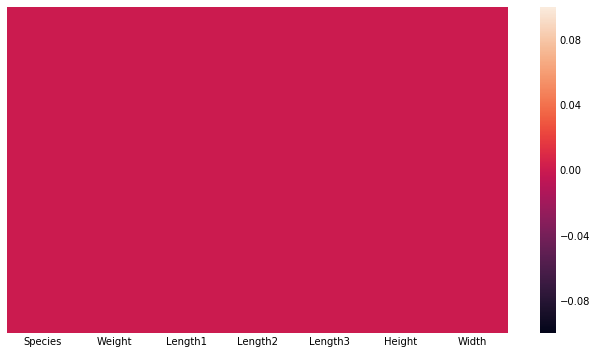

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(fish_data.isnull(),yticklabels=False)

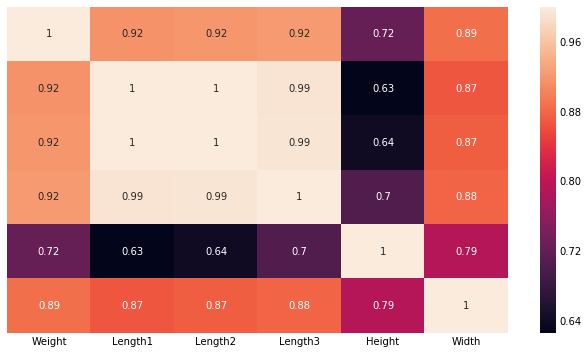

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(fish_data.corr(),yticklabels=False,annot=True)

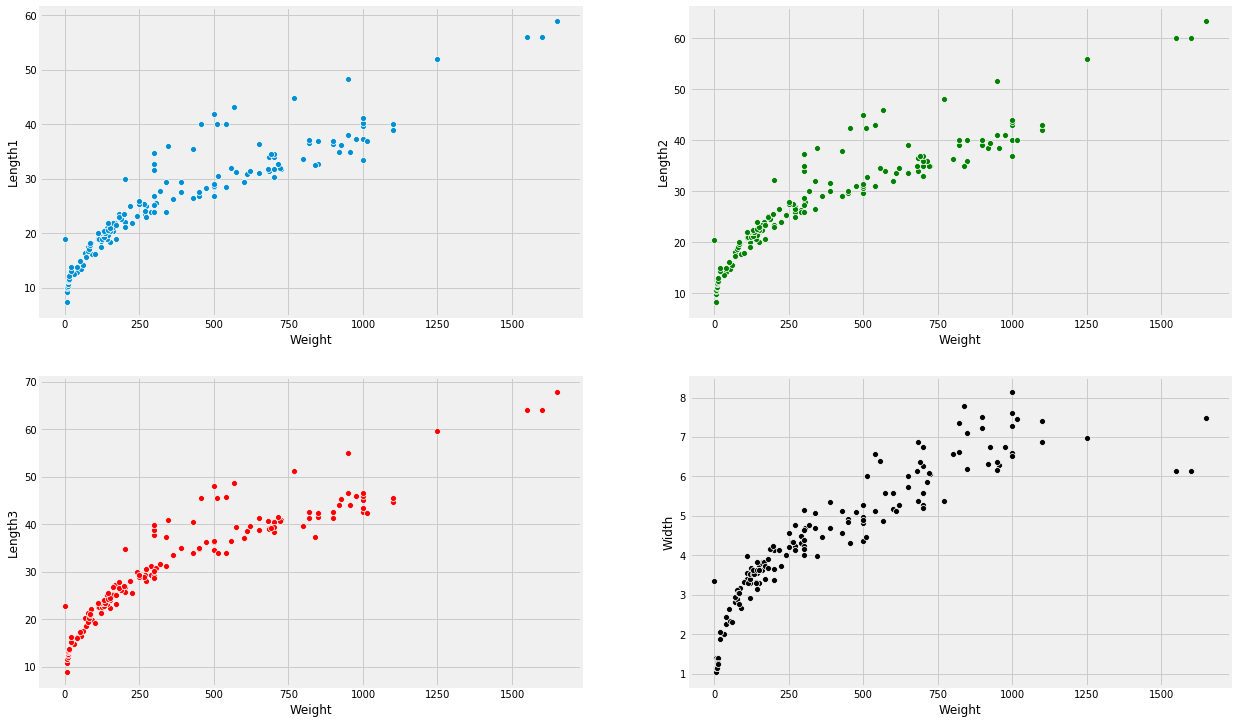

In [8]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.scatterplot(x="Weight",y="Length1",data=fish_data)
fig.add_subplot(2,2,2)
sns.scatterplot(x="Weight",y="Length2",data=fish_data,color="g")
fig.add_subplot(2,2,3)
sns.scatterplot(x="Weight",y="Length3",data=fish_data,color="r")
fig.add_subplot(2,2,4)
sns.scatterplot(x="Weight",y="Width",data=fish_data,color="black")

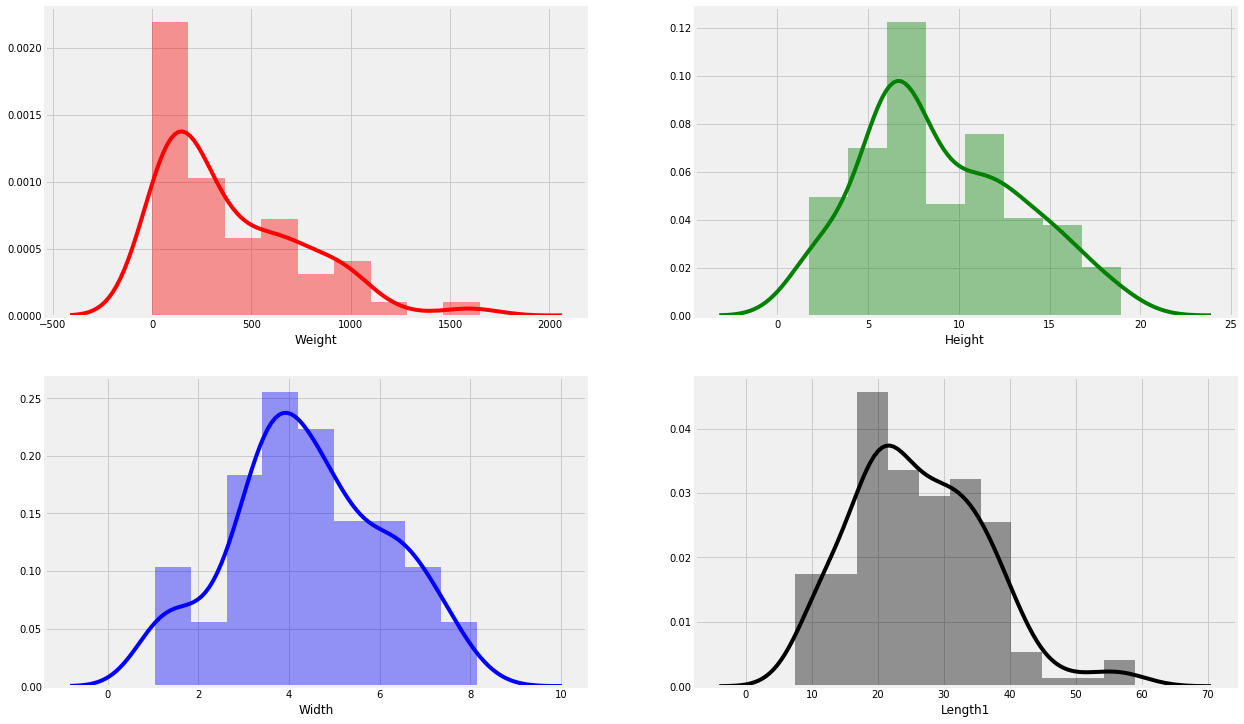

In [9]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.distplot(fish_data["Weight"],color="r")
fig.add_subplot(2,2,2)
sns.distplot(fish_data["Height"],color="g")
fig.add_subplot(2,2,3)
sns.distplot(fish_data["Width"],color="b")
fig.add_subplot(2,2,4)
sns.distplot(fish_data["Length1"],color="black")

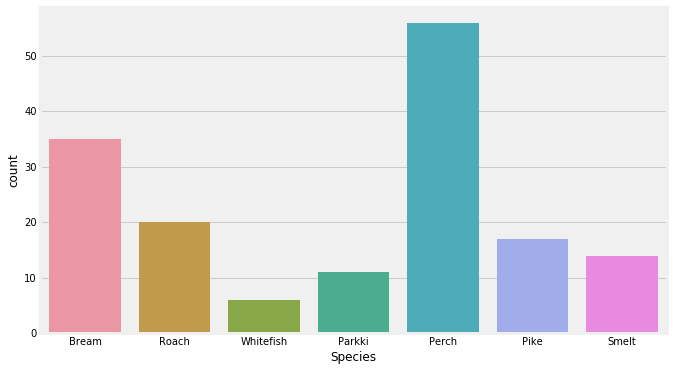

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(fish_data["Species"])

<Figure size 720x432 with 0 Axes>

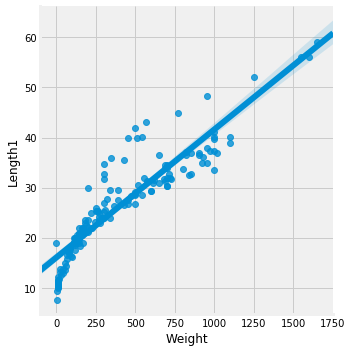

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(x="Weight",y="Length1",data=fish_data)

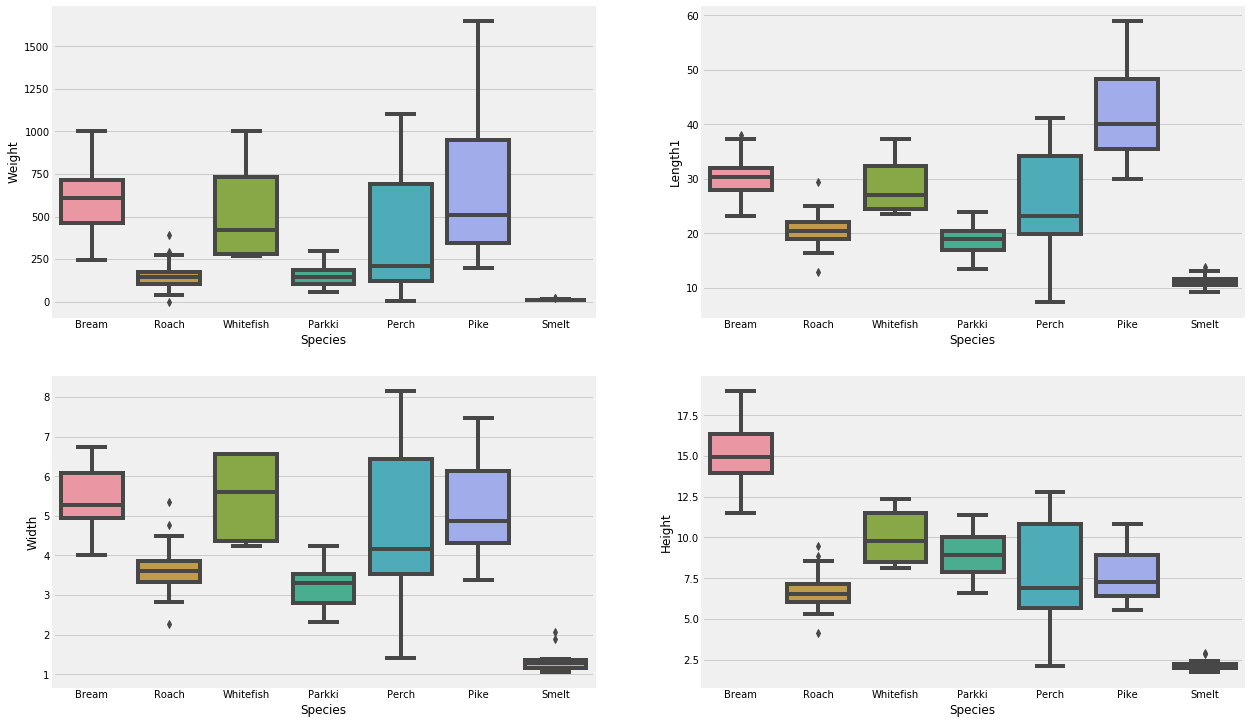

In [12]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.boxplot(x="Species",y="Weight",data=fish_data)
fig.add_subplot(2,2,2)
sns.boxplot(x="Species",y="Length1",data=fish_data)
fig.add_subplot(2,2,3)
sns.boxplot(x="Species",y="Width",data=fish_data)
fig.add_subplot(2,2,4)
sns.boxplot(x="Species",y="Height",data=fish_data)

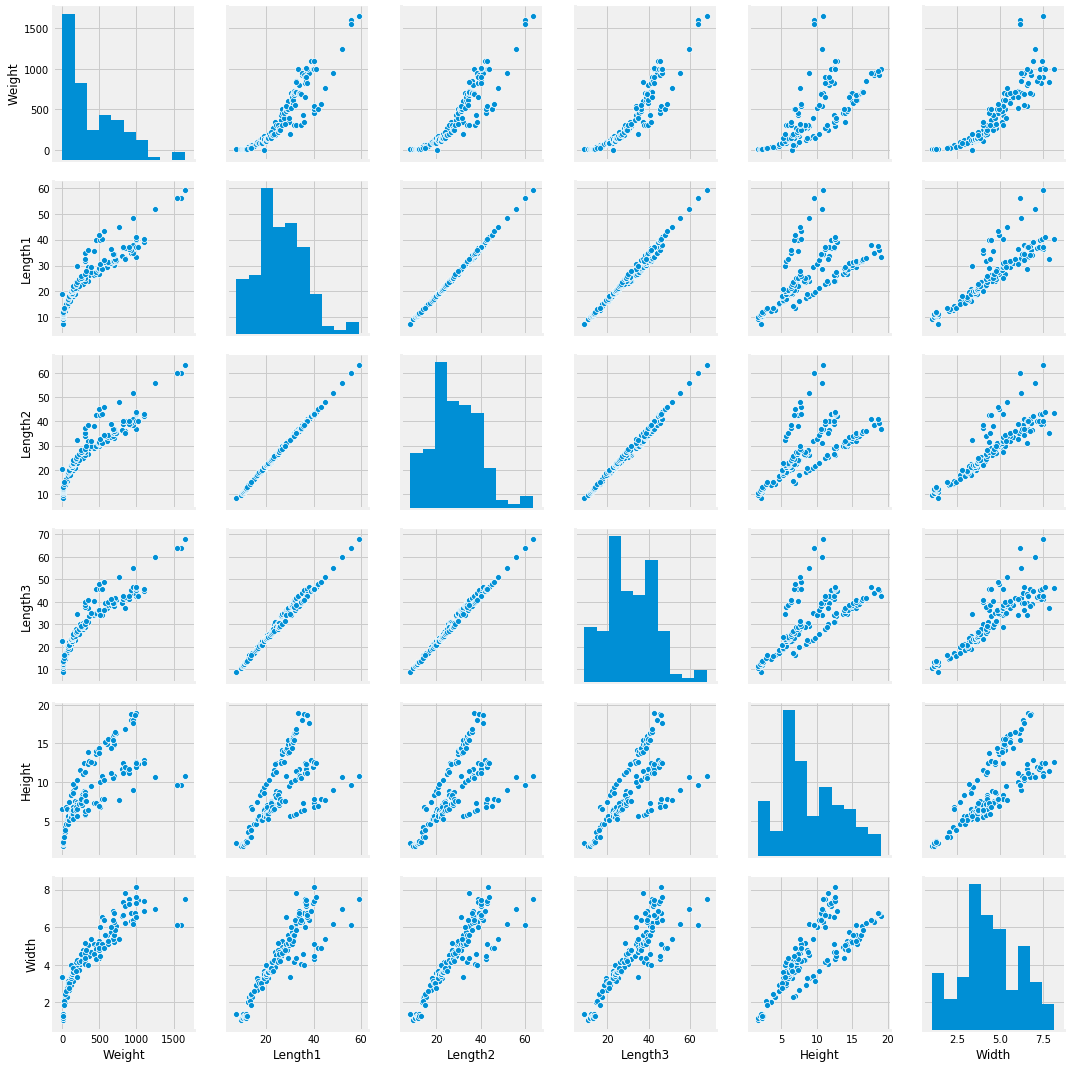

In [13]:
sns.pairplot(fish_data)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

[Text(0.5, 0, '\nLength3'),
 Text(0.5, 0, '\nLength1'),
 Text(0.5, 0, '\nHeight')]

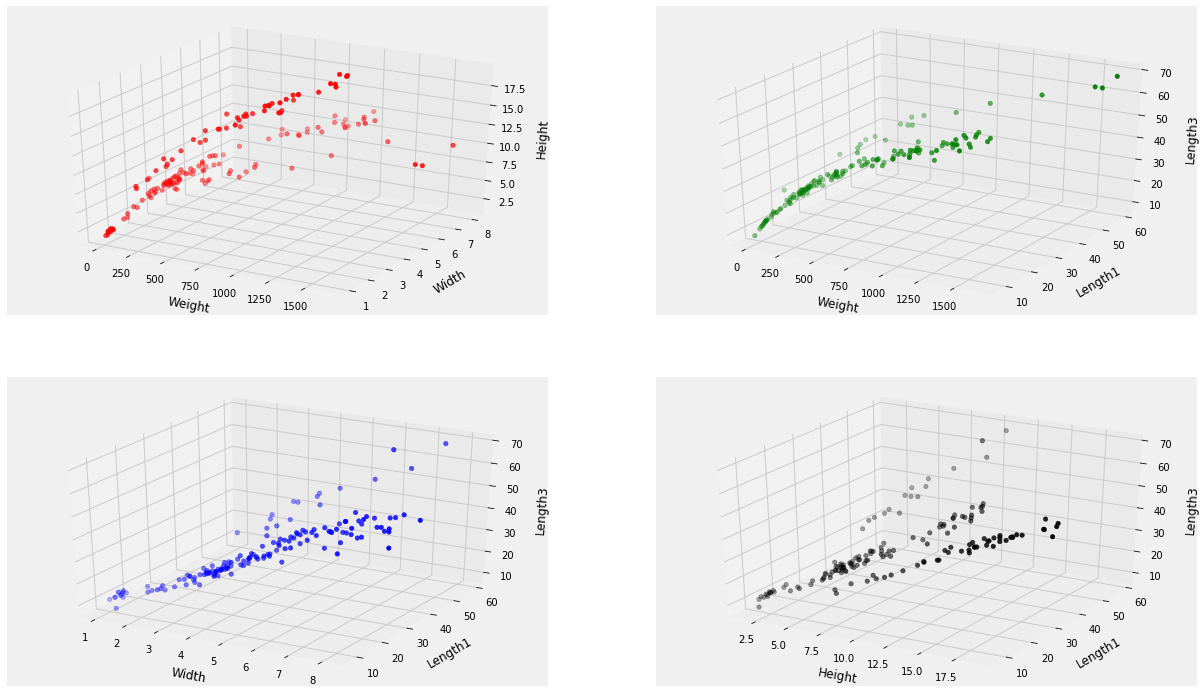

In [15]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(fish_data["Weight"],fish_data["Width"],fish_data["Height"],c="r")
ax.set(xlabel='\nWeight',ylabel='\nWidth',zlabel='\nHeight')
ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(fish_data["Weight"],fish_data["Length1"],fish_data["Length3"],c="g")
ax.set(xlabel='\nWeight',ylabel='\nLength1',zlabel='\nLength3')
ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(fish_data["Width"],fish_data["Length1"],fish_data["Length3"],c="b")
ax.set(xlabel='\nWidth',ylabel='\nLength1',zlabel='\nLength3')
ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(fish_data["Height"],fish_data["Length1"],fish_data["Length3"],c="black")
ax.set(xlabel='\nHeight',ylabel='\nLength1',zlabel='\nLength3')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [17]:
en=LabelEncoder()
fish_data["Species"]=en.fit_transform(fish_data["Species"])

In [18]:
x=fish_data.drop(["Weight"],axis=1)
y=fish_data["Weight"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [19]:
data_describe=x.describe().transpose()
def standardscalar(data):
    return (data-data_describe["mean"])/data_describe["std"]
x_train=standardscalar(x_train)
x_test=standardscalar(x_test)

In [20]:
slr=LinearRegression()
slr.fit(x_train,y_train)
print(slr.intercept_)
print(slr.coef_)

398.85253207714385
[  56.7806669   432.95677388  328.24415654 -542.90478698  206.04938372
   -1.0485588 ]


In [21]:
y_pred=slr.predict(x_test)

Text(0.5, 1.0, 'Linear regression')

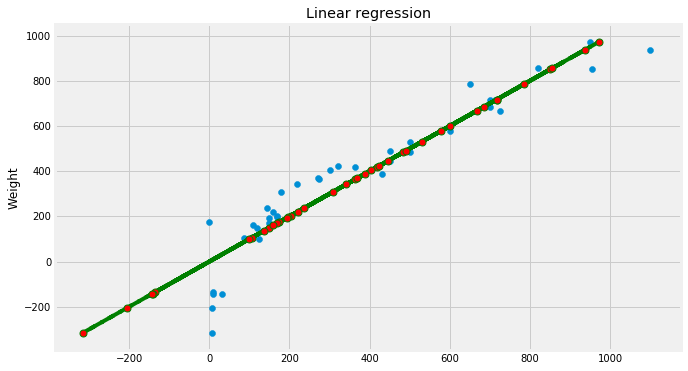

In [22]:
plt.figure(figsize=(10,6))
plt.plot(y_pred,y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')
plt.scatter(y_test,y_pred,marker="o")
plt.ylabel("Weight")
plt.title("Linear regression")

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [24]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,10338.687477,101.679337,74.650066,0.883993


# Polynomial regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [26]:
#x_test=sorted(x_test,reverse=False)
model=make_pipeline(PolynomialFeatures(degree=2,include_bias=False),LinearRegression())
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [27]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,2196.66248,46.868566,29.259877,0.975375


Text(0.5, 1.0, 'Polynomial regression')

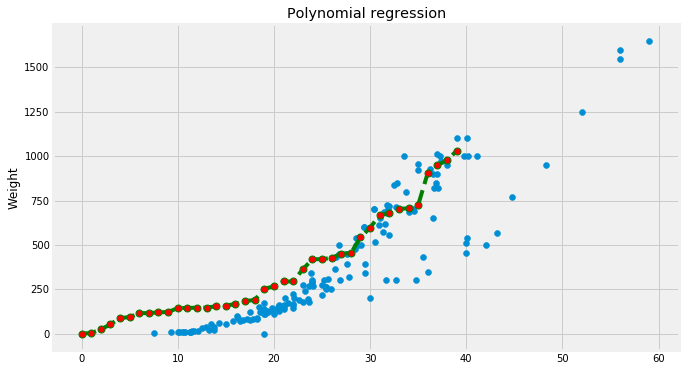

In [28]:
y_pred=sorted(y_pred,reverse=False)
plt.figure(figsize=(10,6))
plt.plot(y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')
plt.scatter(fish_data["Length1"],fish_data["Weight"],marker="o")
plt.ylabel("Weight")
plt.title("Polynomial regression")

# Learning curves

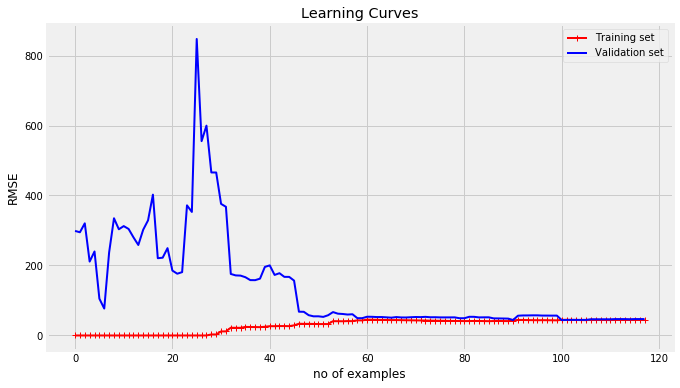

In [29]:
train_error,validation_error=[],[]
for i in range(1,len(y_train)):
    x_train_f,y_train_f=x_train[0:i],y_train[0:i]
    model=make_pipeline(PolynomialFeatures(degree=2,include_bias=False),LinearRegression())
    model.fit(x_train_f,y_train_f)
    y_val_predict=model.predict(x_test)
    y_train_predict=model.predict(x_train[0:i])
    train_error.append(mean_squared_error(y_train[0:i],y_train_predict))
    validation_error.append(mean_squared_error(y_test,y_val_predict))
plt.figure(figsize=(10,6))
plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="Training set")
plt.plot(np.sqrt(validation_error),"b-",linewidth=2,label="Validation set")
plt.ylabel("RMSE")
plt.xlabel("no of examples")
plt.title("Learning Curves")
plt.legend()
plt.show()